# 1. Image Classification using CNN

(1) 모듈 불러오기

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

(2) 데이터셋 불러오기

In [ ]:
train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_set, batch_size=8,
                                          shuffle=True)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_set, batch_size=8,
                                         shuffle=False)

#데이터 클래스
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


(3) 데이터 확인

  dog plane plane horse   car   cat plane   cat


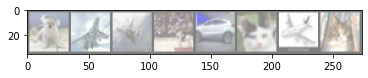

In [ ]:
# 이미지를 보여주기 위한 함수
def img_show(img):
    img = img / 2 + 0.5     # unnormalize
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(train_loader)
images, labels = dataiter.next()

# 라벨과 이미지 보여주기
img_show(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))
plt.show()

(4) CNN 모델 정의하기

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        'your code here'
        # input channels = 3, output channels = 6, kernel size = 5, convolution layer
        'your code here'
        # kernel size = 2, stride = 2, padding = 0, max-pooling layer
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear('your code here')
        # input features, output features
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear('your code here')

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        'your code here'
        return x

net = Net()

(5) Loss와 Optimizer 정의하기

In [ ]:
# SGD optimizer with learning rate = 0.001, momentum = 0.9
# cross-entropy loss

criterion = 'your code here'
optimizer = 'your code here'

(6) 모델 학습

In [ ]:
for epoch in range(5):  # Iterate many times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Set gradient as 0
        'your code here'

        # Forward + Backpropatation + Optimization
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        'your code here'

        # Print the training loss
        running_loss += loss.item()
        if i % 1000 == 999:    # print every 1000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

print('Finished Training')

[1,  1000] loss: 2.303
[1,  2000] loss: 2.300
[1,  3000] loss: 2.216
[1,  4000] loss: 2.035
[1,  5000] loss: 1.980
[1,  6000] loss: 1.901
[2,  1000] loss: 1.798
[2,  2000] loss: 1.747
[2,  3000] loss: 1.689
[2,  4000] loss: 1.650
[2,  5000] loss: 1.620
[2,  6000] loss: 1.565
[3,  1000] loss: 1.551
[3,  2000] loss: 1.503
[3,  3000] loss: 1.471
[3,  4000] loss: 1.468
[3,  5000] loss: 1.439
[3,  6000] loss: 1.425
[4,  1000] loss: 1.383
[4,  2000] loss: 1.382
[4,  3000] loss: 1.382
[4,  4000] loss: 1.364
[4,  5000] loss: 1.362
[4,  6000] loss: 1.356
[5,  1000] loss: 1.305
[5,  2000] loss: 1.327
[5,  3000] loss: 1.304
[5,  4000] loss: 1.292
[5,  5000] loss: 1.305
[5,  6000] loss: 1.253
[6,  1000] loss: 1.229
[6,  2000] loss: 1.248
[6,  3000] loss: 1.242
[6,  4000] loss: 1.224
[6,  5000] loss: 1.248
[6,  6000] loss: 1.229
[7,  1000] loss: 1.184
[7,  2000] loss: 1.210
[7,  3000] loss: 1.192
[7,  4000] loss: 1.177
[7,  5000] loss: 1.178
[7,  6000] loss: 1.176
[8,  1000] loss: 1.144
[8,  2000] 

(7) 모델 테스트

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog
Predicted:    cat  ship  ship plane  bird  frog   car  frog


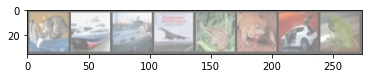

In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
plt.show()
img_show(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(8)))

(8) 정답률 계산

In [ ]:
correct = 0
total = 0
with 'your code here':
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += ('your code here').sum().item()
        # Hint : Find the condition in classification problem

print('네트워크의 정확도: {} %'.format(
    100 * correct / total))

네트워크의 정확도: 56.55 %


# 2. Time Series Data processing using RNN

(1) 모듈 import

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns

(2) 데이터 로드

In [ ]:
# Import csv file from your drive.
from google.colab import files 
uploaded = files.upload()

# Make sure the your file name matches.
import io 
df = pd.read_csv(io.BytesIO(uploaded['kospi.csv']))

Saving kospi.csv to kospi.csv


(3) 데이터 확인

In [ ]:
# Before preprocessing the dataframe, we need to check if there exists any missing value. 
'your code here'

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,431.000000,431.000000,431.000000,431.000000,431.000000,4.310000e+02
mean,2122.449765,2134.756032,2106.976497,2121.195427,2121.195427,6.482257e+05
std,159.523899,155.808986,161.926432,159.038127,159.038127,2.593637e+05
min,1474.449951,1516.750000,1439.430054,1457.640015,1457.640015,0.000000e+00
25%,2057.589966,2065.619995,2041.244995,2055.299927,2055.299927,4.406500e+05
50%,2132.379883,2141.270020,2119.070068,2131.239990,2131.239990,6.087000e+05
75%,2211.449951,2220.595093,2196.599976,2209.244995,2209.244995,8.109500e+05
max,2455.280029,2458.169922,2429.939941,2443.580078,2443.580078,1.984200e+06


(4) 데이터 전처리

In [ ]:
scaler = MinMaxScaler()
df[['Open','High','Low','Close','Volume']] = scaler.fit_transform(df[['Open','High','Low','Close','Volume']])

X = df[['Open','High','Low','Volume']].values 
y = df['Close'].values

def seq_dataset(x, y, seq_length):
  x_seq = []
  y_seq = []
  for i in range(len(x) - seq_length):
    x_seq.append(x[i:i+seq_length])
    y_seq.append(y[i+seq_length])

  return 'your code here'
  # We need to convert the lists to Pytorch tensor.
  # Convert the dimension of y to be two-dimensional, since we will use MSELoss, which deals with two-dimensional target.

split = 300
seq_length = 5

# Split dat for train-test.
x_seq, y_seq = seq_dataset(X, y, seq_length)
x_train_seq = x_seq[:split]
y_train_seq = y_seq[:split]
x_test_seq = x_seq[split:]
y_test_seq = y_seq[split:]

print(x_train_seq.size(), y_train_seq.size())
print(x_test_seq.size(), y_test_seq.size())

torch.Size([300, 5, 4]) torch.Size([300, 1])
torch.Size([126, 5, 4]) torch.Size([126, 1])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  del sys.path[0]


(5) 모델 구성

In [ ]:
# Now, it's time for the real game, Neural Network Setting. We will emply LSTM model in this case.
input_size = x_seq.size(2) # What is the number of input variables? 
hidden_size = 8 
num_layers = 2
output_size = 1

class Net('your code here'):
  # The order of the four parameters below is related to the general structure of deep learning.
  def __init__(self, 'your code here'):
    super(Net, self).__init__()
    self.rnn = torch.nn.LSTM('your code here', num_layers=num_layers, batch_first=True)
    self.fc = torch.nn.Linear('your code here', output_size, bias=True)
  
  def forward(self, x):
    x, _status = self.rnn(x)
    x = self.fc(x[:, -1])
    return x

LSTM = Net('your code here', 1)

(6) Loss와 Optimizer 설정

In [ ]:
# Take MSE and Adam as loss and optimizer respectively (with learning rate 0.01)
criterion = torch.nn.MSELoss()
optimizer = 'your code here'

(7) 모델 학습 및 검증

epoch: 0 loss: 0.1948438
epoch: 10 loss: 0.0391286
epoch: 20 loss: 0.0187346
epoch: 30 loss: 0.0117339
epoch: 40 loss: 0.0098055
epoch: 50 loss: 0.0080392
epoch: 60 loss: 0.0055470
epoch: 70 loss: 0.0029860
epoch: 80 loss: 0.0019991
epoch: 90 loss: 0.0019563
epoch: 100 loss: 0.0017422
epoch: 110 loss: 0.0016833
epoch: 120 loss: 0.0016078
epoch: 130 loss: 0.0015628
epoch: 140 loss: 0.0015211
epoch: 150 loss: 0.0014869
epoch: 160 loss: 0.0014555
epoch: 170 loss: 0.0014264
epoch: 180 loss: 0.0013986
epoch: 190 loss: 0.0013715
epoch: 200 loss: 0.0013450
epoch: 210 loss: 0.0013188
epoch: 220 loss: 0.0012928
epoch: 230 loss: 0.0012672
epoch: 240 loss: 0.0012418
epoch: 250 loss: 0.0012167
epoch: 260 loss: 0.0011919
epoch: 270 loss: 0.0011675
epoch: 280 loss: 0.0011436
epoch: 290 loss: 0.0011202
epoch: 300 loss: 0.0010973
epoch: 310 loss: 0.0010751
epoch: 320 loss: 0.0010537
epoch: 330 loss: 0.0010332
epoch: 340 loss: 0.0010136
epoch: 350 loss: 0.0009951
epoch: 360 loss: 0.0009779
epoch: 370 l

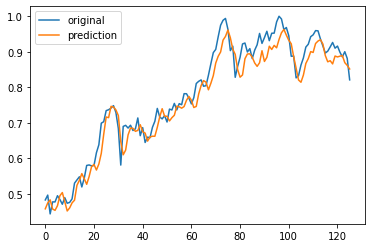

In [ ]:
#Set the number of iterations for optimization process.
num_iteration = 500

for i in range(num_iteration+1):
  optimizer.zero_grad() # Why do we include this line?
  outputs = LSTM(x_train_seq)
  loss = criterion(outputs, 'your code here') 
  'your code here'
  if i % 10 == 0:
    print('epoch: %d loss: %.7f' %(i, loss.item()))

# Compare the original and predicted price values via visualization. 
plt.plot(y_test_seq)
plt.plot(LSTM(x_test_seq).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()  